In [53]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point  #Polygon
from tqdm import tqdm
from itertools import product
import math
from matplotlib import pyplot
import math
from sklearn.metrics import mean_squared_error

In [38]:
oasi=pd.read_csv('OASI.csv')

In [39]:
oasi['oasi']=0

In [40]:
oasi

,Date,CPI_ALL,Employment,Unemployment,Crime,CPI_Housing,CPI_Food,CPI_edu,CPI_medicare,CPI_fuels,CPI_recreation,oasi
0,2013-01,238.015,56.0,10.9,167.90,282.770,239.902,142.761,406.091,287.171,102.276,0
1,2013-02,239.753,56.6,10.3,140.76,283.004,238.699,144.206,408.199,288.568,103.670,0
2,2013-03,239.995,56.5,9.8,162.33,283.613,238.345,144.189,405.563,286.947,104.036,0
3,2013-04,239.043,56.9,9.4,157.32,283.952,238.736,143.876,406.823,280.664,104.044,0
4,2013-05,239.346,57.0,9.6,166.08,284.860,238.235,143.571,405.528,286.392,103.919,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-10,317.014,59.9,4.5,205.99,404.703,320.025,155.490,553.630,445.079,120.946,0
118,2022-11,314.633,60.4,4.5,189.43,405.616,321.688,155.897,553.054,436.738,120.381,0
119,2022-12,312.601,60.3,4.4,201.19,407.918,321.802,155.475,548.472,455.633,120.139,0
120,2023-01,318.591,60.2,4.9,195.34,409.720,324.189,155.327,558.533,580.765,120.785,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
oasi['norm_cpi_all'] = MinMaxScaler().fit_transform(np.array(oasi['CPI_ALL']).reshape(-1,1))
oasi['norm_employment'] = MinMaxScaler().fit_transform(np.array(oasi['Employment']).reshape(-1,1))
oasi['norm_unemployment'] = MinMaxScaler().fit_transform(np.array(oasi['Unemployment']).reshape(-1,1))
oasi['norm_crime'] = MinMaxScaler().fit_transform(np.array(oasi['Crime']).reshape(-1,1))

In [43]:
oasi['oasi'] = oasi['norm_employment'] / (oasi['norm_unemployment'] + oasi['norm_cpi_all'] + oasi['norm_crime'])

In [44]:
oasi

,Date,CPI_ALL,Employment,Unemployment,Crime,CPI_Housing,CPI_Food,CPI_edu,CPI_medicare,CPI_fuels,CPI_recreation,oasi,norm_cpi_all,norm_employment,norm_unemployment,norm_crime
0,2013-01,238.015,56.0,10.9,167.90,282.770,239.902,142.761,406.091,287.171,102.276,0.647642,0.000000,0.576923,0.456376,0.434430
1,2013-02,239.753,56.6,10.3,140.76,283.004,238.699,144.206,408.199,288.568,103.670,1.234132,0.021570,0.615385,0.416107,0.060961
2,2013-03,239.995,56.5,9.8,162.33,283.613,238.345,144.189,405.563,286.947,104.036,0.796144,0.024573,0.608974,0.382550,0.357782
3,2013-04,239.043,56.9,9.4,157.32,283.952,238.736,143.876,406.823,280.664,104.044,0.965484,0.012758,0.634615,0.355705,0.288840
4,2013-05,239.346,57.0,9.6,166.08,284.860,238.235,143.571,405.528,286.392,103.919,0.806290,0.016519,0.641026,0.369128,0.409385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-10,317.014,59.9,4.5,205.99,404.703,320.025,155.490,553.630,445.079,120.946,0.420643,0.980428,0.826923,0.026846,0.958580
118,2022-11,314.633,60.4,4.5,189.43,405.616,321.688,155.897,553.054,436.738,120.381,0.502787,0.950879,0.858974,0.026846,0.730700
119,2022-12,312.601,60.3,4.4,201.19,407.918,321.802,155.475,548.472,455.633,120.139,0.463773,0.925660,0.852564,0.020134,0.892528
120,2023-01,318.591,60.2,4.9,195.34,409.720,324.189,155.327,558.533,580.765,120.785,0.453527,1.000000,0.846154,0.053691,0.812027


In [ ]:
# pd.DataFrame(crime_all).to_csv('crime_all.csv', encoding='utf-8', index=False)

In [45]:
from statsmodels.tsa.arima.model import ARIMA


In [279]:
oasi_arima=oasi[['Date', 'oasi']].set_index('Date')

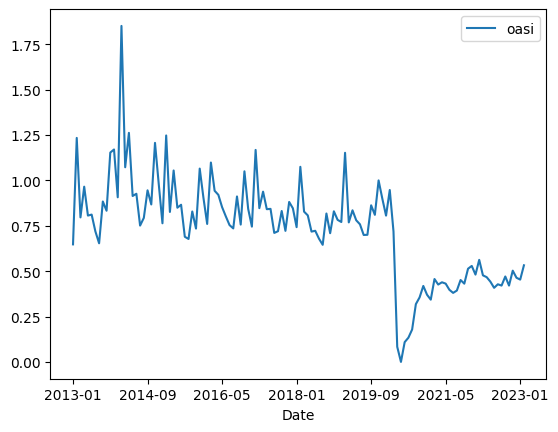

In [50]:
oasi_arima.plot()
pyplot.show()

In [547]:
e=oasi[['Date', 'Employment']].set_index('Date')
ue=oasi[['Date', 'Unemployment']].set_index('Date')
c=oasi[['Date', 'Crime']].set_index('Date')
cp=oasi[['Date', 'CPI_ALL']].set_index('Date')

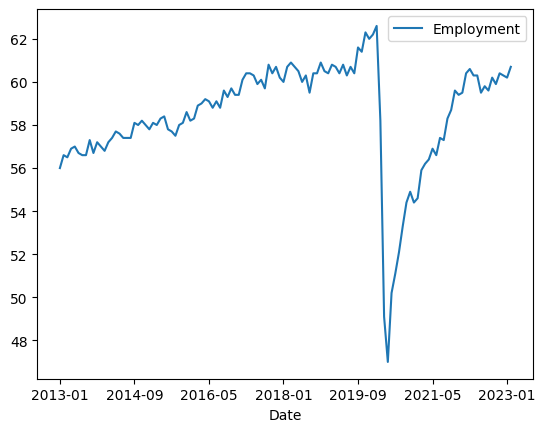

In [546]:
e.plot()
pyplot.show()

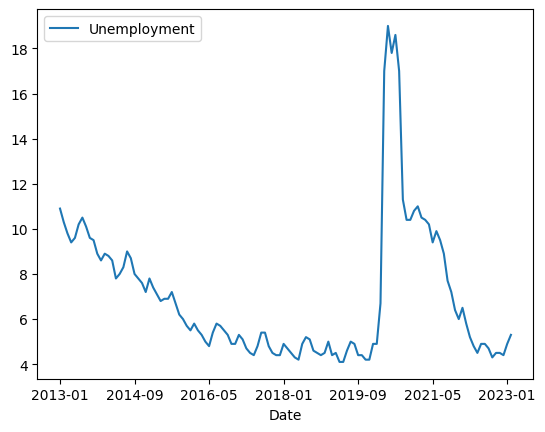

In [548]:
ue.plot()
pyplot.show()

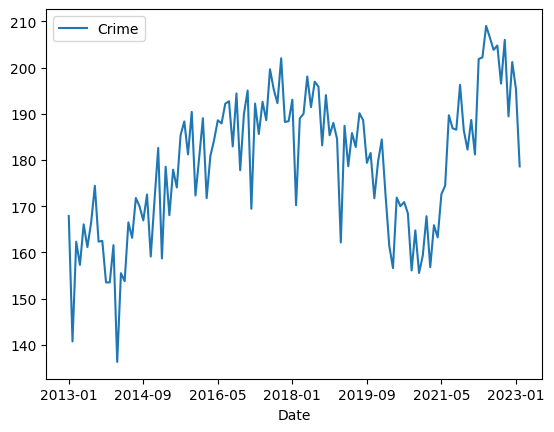

In [549]:
c.plot()
pyplot.show()

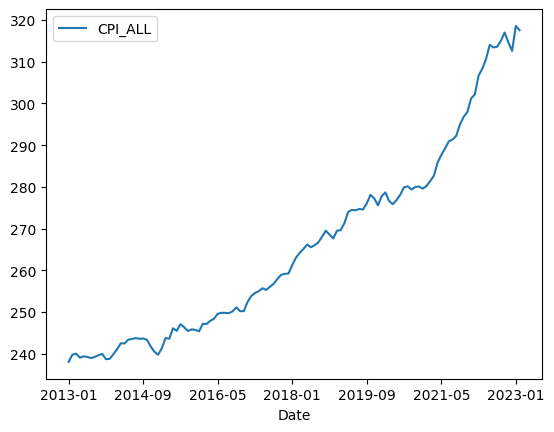

In [550]:
cp.plot()
pyplot.show()

In [322]:
model = ARIMA(oasi_arima, order=(6,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   oasi   No. Observations:                  122
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  47.345
Date:                Sun, 23 Apr 2023   AIC                            -80.690
Time:                        14:36:32   BIC                            -61.119
Sample:                    01-01-2013   HQIC                           -72.741
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6141      0.068     -8.993      0.000      -0.748      -0.480
ar.L2         -0.0632      0.141     -0.446      0.655      -0.340       0.214
ar.L3          0.1291      0.107      1.208      0.2

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.796148, expected=1.152137
predicted=1.152138, expected=0.768536
predicted=0.768536, expected=0.835356
predicted=1.108881, expected=0.780288
predicted=0.780288, expected=0.758189
predicted=0.758189, expected=0.699398
predicted=0.699398, expected=0.700359


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=1.110804, expected=0.862875
predicted=0.730127, expected=0.810316
predicted=0.852898, expected=0.999991
predicted=0.999992, expected=0.899610
predicted=1.074257, expected=0.805972
predicted=0.805972, expected=0.947136
predicted=0.812358, expected=0.718346
predicted=0.884917, expected=0.083368
predicted=0.083368, expected=0.000000
predicted=-0.000000, expected=0.109064
predicted=0.109064, expected=0.133501
predicted=0.133501, expected=0.178607


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.178607, expected=0.318339
predicted=0.888664, expected=0.355437
predicted=0.277147, expected=0.418554
predicted=0.472266, expected=0.370043


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.269910, expected=0.343060
predicted=0.334508, expected=0.456678
predicted=0.456678, expected=0.426223
predicted=0.413666, expected=0.438785


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.379771, expected=0.431420
predicted=0.410019, expected=0.397276
predicted=0.514822, expected=0.380350
predicted=0.321020, expected=0.393199


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.387021, expected=0.451240
predicted=0.416162, expected=0.431164
predicted=0.431164, expected=0.513402
predicted=0.513402, expected=0.528879
predicted=0.528879, expected=0.481119
predicted=0.481119, expected=0.562276
predicted=0.482374, expected=0.477016


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.445762, expected=0.467046
predicted=0.470940, expected=0.442137
predicted=0.394593, expected=0.408178
predicted=0.408178, expected=0.427758
predicted=0.427758, expected=0.420655


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=0.495875, expected=0.470695
predicted=0.470695, expected=0.420643
predicted=0.420643, expected=0.502787
predicted=0.502788, expected=0.463773
predicted=0.476544, expected=0.453527
predicted=0.478477, expected=0.532302
Test RMSE: 0.185


/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/alexdseo/minifo

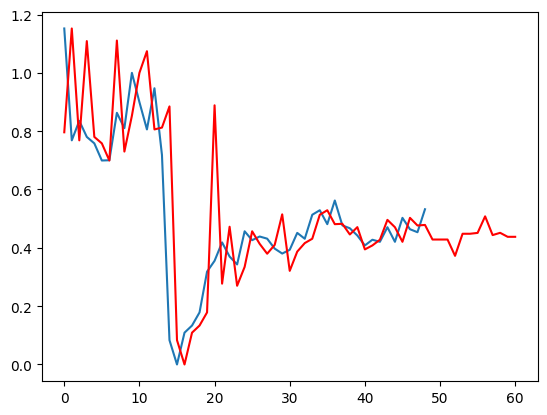

In [457]:
X = oasi_arima.values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history[-12:], order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

for t in range(12):
    model = ARIMA(history[-12:], order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(np.array([yhat]))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

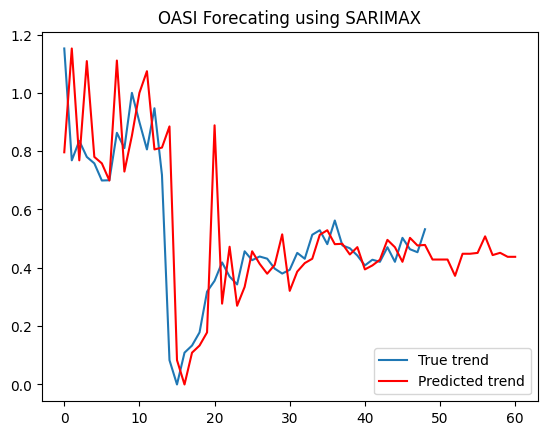

In [409]:
pyplot.plot(test, label='True trend')
pyplot.plot(predictions, color='red', label='Predicted trend')
pyplot.legend(loc="lower right")
pyplot.title('OASI Forecating using SARIMAX')
pyplot.show()

In [412]:
test_date=list(oasi.iloc[73:]['Date'])

In [413]:
pred_date=test_date + ['2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10','2023-11',
                 '2023-12','2024-01','2024-02']

In [414]:
true=pd.DataFrame(test, columns=['true_oasi'])
true['date'] =test_date
#true=true.set_index('date')

In [415]:
pred=pd.DataFrame(predictions, columns=['pred_oasi'])
pred['date'] =pred_date
#pred=pred.set_index('date')

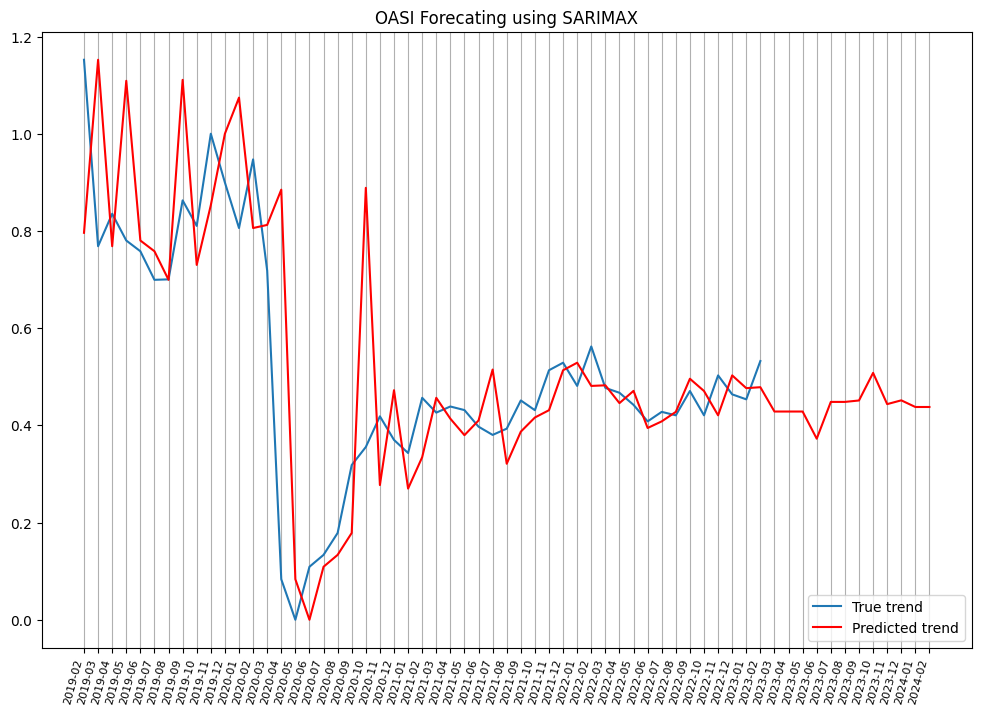

In [416]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(true['date'], true['true_oasi'], label='True trend')
plt.plot(pred['date'], pred['pred_oasi'], color='red', label='Predicted trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating using SARIMAX')
plt.show()

In [417]:
oasi_tree=oasi[['Date', 'oasi']].set_index('Date')

In [422]:
# xgboost
import xgboost
print("xgboost", xgboost.__version__)

xgboost 1.7.0


>expected= 1.1521374287882715 predicted= 0.8401507
>expected= 0.7685360088920945 predicted= 0.9198889
>expected= 0.8353563102934543 predicted= 0.9101163
>expected= 0.7802883959637874 predicted= 0.85385597
>expected= 0.7581894011277023 predicted= 0.8413164
>expected= 0.699397706007743 predicted= 0.8736368
>expected= 0.7003586943898112 predicted= 0.7003252
>expected= 0.8628751512117018 predicted= 0.72046435
>expected= 0.8103159414762732 predicted= 0.80924404
>expected= 0.9999913536228383 predicted= 1.0710108
>expected= 0.8996100332290046 predicted= 0.96386397
>expected= 0.8059720035235467 predicted= 0.75105035
>expected= 0.9471364280759805 predicted= 0.80098176
>expected= 0.718345638466313 predicted= 0.8999339
>expected= 0.08336811228639307 predicted= 1.0735891
>expected= 0.0 predicted= 0.8555378
>expected= 0.10906393477811299 predicted= 0.025601508
>expected= 0.13350129571385191 predicted= 0.124769166
>expected= 0.17860667055957355 predicted= 0.11252837
>expected= 0.3183391855157718 pre

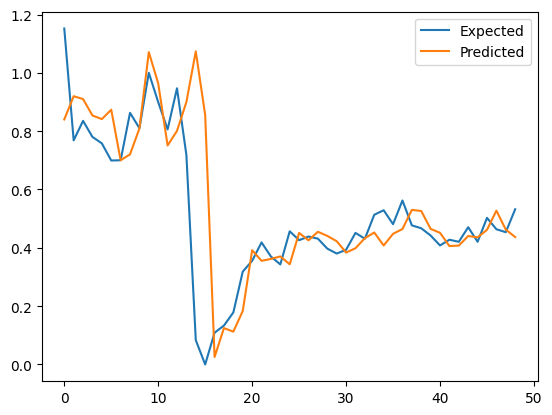

In [552]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    
    return yhat[0]

# load the dataset
series = oasi_tree
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
#mse, y, yhat = walk_forward_validation(data, 49)
predictions = list()
# split dataset
train, test = train_test_split(data, 49)
# seed history with training dataset
history = [x for x in train]
# step over each time-step in the test set
for i in range(len(test)):
    # split test row into input and output columns
    testX, testy = test[i, :-1], test[i, -1]
    # fit model on history and make a prediction
    yhat = xgboost_forecast(history, testX)
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(test[i])
    # summarize progress
    print('>expected=' , testy, 'predicted=',yhat)
    # estimate prediction error
#mse = mean_squared_error(test[:, -1], predictions)
rmse = math.sqrt(mean_squared_error(test[:, -1], predictions))
y=test[:, -1]
yhat = predictions

print('Test RMSE: %.3f' % rmse)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [442]:
last_true=np.array(list(oasi_tree.iloc[-6:]['oasi']))

In [443]:
future_1year=[]
for i in range(12):
    p = xgboost_forecast(history, last_true)
    future_1year.append(p)
    n_his = np.append(last_true, [p])
    history.append(n_his)
    last_true = np.append(last_true[1:], [p])

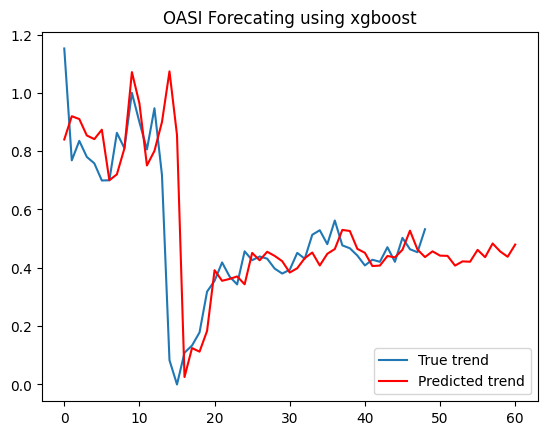

In [446]:
pyplot.plot(y, label='True trend')
pyplot.plot(yhat+future_1year, color='red', label='Predicted trend')
pyplot.legend(loc="lower right")
pyplot.title('OASI Forecating using xgboost')
pyplot.show()

In [450]:
true=pd.DataFrame(y, columns=['true_oasi'])
true['date'] =test_date
#true=true.set_index('date')

In [451]:
pred=pd.DataFrame(yhat+future_1year, columns=['pred_oasi'])
pred['date'] =pred_date
#pred=pred.set_index('date')

In [455]:
pred['pred_oasi']

0     0.840151
1     0.919889
2     0.910116
3     0.853856
4     0.841316
        ...   
56    0.436457
57    0.483422
58    0.456241
59    0.437924
60    0.479738
Name: pred_oasi, Length: 61, dtype: float32

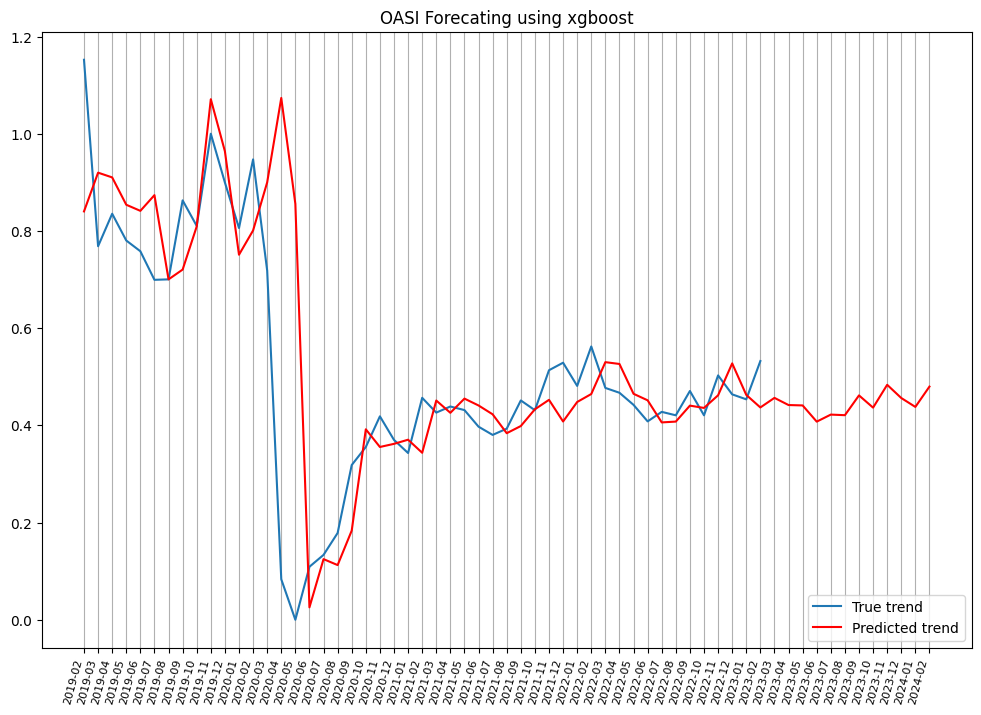

In [453]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(true['date'], true['true_oasi'], label='True trend')
plt.plot(pred['date'], pred['pred_oasi'], color='red', label='Predicted trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating using xgboost')
plt.show()

In [458]:

# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

In [520]:
train = asarray(train)
# split into input and output columns
X_train, y_train = train[:, :-1], train[:, -1]

In [521]:
test = asarray(test)
# split into input and output columns
X_test, y_test = test[:, :-1], test[:, -1]

In [522]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [523]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [508]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(6, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit an xgboost model and make a one step prediction
def lstm_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    
    return yhat[0]

In [509]:
# fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

2023-04-23 16:11:48.325867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [499]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 40ms/step


2023-04-23 16:07:15.881649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [554]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.2679117261743171

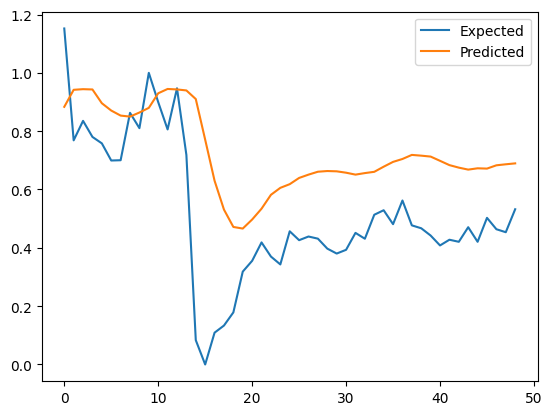

In [503]:
pyplot.plot(y_test, label='Expected')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [532]:
X_train

array([[[0.64764206],
        [1.23413203],
        [0.79614361],
        [0.96548407],
        [0.80629015],
        [0.8116689 ]],

       [[1.23413203],
        [0.79614361],
        [0.96548407],
        [0.80629015],
        [0.8116689 ],
        [0.71920044]],

       [[0.79614361],
        [0.96548407],
        [0.80629015],
        [0.8116689 ],
        [0.71920044],
        [0.65352454]],

       [[0.96548407],
        [0.80629015],
        [0.8116689 ],
        [0.71920044],
        [0.65352454],
        [0.88388701]],

       [[0.80629015],
        [0.8116689 ],
        [0.71920044],
        [0.65352454],
        [0.88388701],
        [0.83287406]],

       [[0.8116689 ],
        [0.71920044],
        [0.65352454],
        [0.88388701],
        [0.83287406],
        [1.15334625]],

       [[0.71920044],
        [0.65352454],
        [0.88388701],
        [0.83287406],
        [1.15334625],
        [1.17034779]],

       [[0.65352454],
        [0.88388701],
        [0.8328740

In [529]:
kkkk=future_X.reshape((future_X.shape[0], n_features))

In [533]:
kkkk

array([[0.47069525],
       [0.42064319],
       [0.50278736],
       [0.46377291],
       [0.45352713],
       [0.53230236]])

In [543]:
np.vstack((X_train,kkkk))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
# demonstrate prediction
future_X = np.array(list(oasi_tree.iloc[-6:]['oasi']))
future_X = future_X.reshape((1, 6, 1))
lstm_pred = model.predict(future_X, verbose=0)
print(lstm_pred)